# outline

- sparse coding (dictionary learning) 稀疏编码

- deep unsupervised neural networks and sparse coding

# dictionary learning

- roots in computational neuroscience (Olshausen and Field. 1996)


- a type of non-orthogonal PCA


- key components: redundancy, sparsity

    we have seen sparsity in Regularization


- together produce data-driven features that are localized, often interpretable


- plays a role in deep learning

## motivation

- neuroscience (Olshausen and Field. 1996)

    "Emergence of simple-cell receptive field properties by learning a sparse code for natural images"

    use math to model when human see an image, how neuron in brain get activated

    not all neurons will be activated at the same time

- 3 properties of receptive fields in visual cortex 视觉皮质的感受域:

    these properties are comparable to function of **wavelet transform**

    - spatially localized

    - oriented

    - bandpass (selective to structure at different spatial scales)



- neuroscience -> image processing

    an unsupervised learning algorithm that try to **find sparse linear codes for images that maximize sparseness** is sufficient to account for these properties

    the resulting sparse image code provides an **efficient representation for image** for downstream analysis

    coz its outputs have a higher degree of statistical independence

## PCA vs. sparse coding

suppose we have a data set {$\mathbf{y}_i \in \mathbb{R}^d$} $i=1,...,n$

PCA finds the best $k$-term linear reconstruction of the data

principal vectors $v_k$ are **orthogonal**

suppose $k=2$, choose mean of data and top 2 principal components $v_1, v_2$ to represent data:

$$
\hat y = f(\lambda) = \bar y + \lambda_1 v_1 + \lambda_2 v_2
$$

**sparse coding change PCA in 2 ways**

1. dictionary elements $v_j$ (columns) don't need to be orthogonal


2. $\lambda$ is sparse
  
$$
\hat {y}^{(\lambda)} = \sum_{j=1}^{|D|} \lambda_j v_j
$$

where most of $\lambda_j$ is 0

$|D|$ is the size of dictionary, want $|D|$ to be large, so we can choose $v_j$ that represent data best



- PCA: 

    less informative, 
    
    similar to sine function and Fourier Transformation 傅里叶变换


- sparse coding (receptive field): 

    very informative, 
    
    similar to Gabor wavelets 伽柏小波
    
    can detect edges at different scales and directions


## formula

- goal: optimize over $\beta$ and $X$ to minimize $l_2$ norm squared loss

$$
\hat {\beta}, \hat X = \underset{\text{sparse } \beta, X}{\arg \min} \sum_{i=1}^n \left \|\mathbf{y}_i -X\beta_i \right \|_2^2
$$

where dictionary elements $X_j$ are shared across all data (similar to principal vectors $v_j$)

a dictionary element also called a codeword, is a column of matrix, a patch of an image

coefficients  $\beta_i$ are specific to each data point $X_i$ (similar to principal components $\lambda_i$)




- spare coding vs. linear regression

    linear regression: data $X$ is known, only optimize over $\beta$

## properties

- provide high dimensional, non-linear representation


- sparsity enables codewords to specialize, isolate features


- a type of topic modeling


- variants succeed in image analysis

## algorithm: alternative minimization

1. select a subset of data vectors $\mathbf{y}_i$


2. for the current dict (fixed $X$), solve for coefficients $\beta_i$ using **sparse linear regression**

$$
\hat \beta_i=\arg \min_{\beta_i}\sum _i\left \|\mathbf{y}_i -X\beta_i \right \|_2^2
$$

3. solve for $X$ using stochastic gradient descent

    compute gradient with respect to $X$


4. solve for $\beta_i$  again

# deep learning: apply sparse coding hierarchically in layer

# dict learning vs. topic modeling

- dict learning

    1) Linear decomposition

    2) sparsity from penalization of $\beta$

$$
Y \sim \sum_j \beta_j X_j\\[1em]
\text{with constraint for } X: 1^TX_j=1, X_j \geq 0
$$

constraint is sum over $X$'s entries

- topic modeling

    1) mixture model

    2) sparsity from Dirichlet prior


$$
Y \sim \sum_{j=1}^K \theta_j p(\cdot |j)
$$

where $\theta_j$ is probability of a word comes from a topic $j$

$p(\cdot |j)$ is distribution of word $i$ conditional on topic $j$


### similarity

- same linear model of dict learning and topic modelling: 

    the probability of word $i$ is in a doc is $Y_i$
    
$$
\begin{align}
\text{Dict learning  } Y_i \sim \sum_{j=1}^K \beta_j [X_j]_{i}\\[1em]
\text{Topic modeling  } Y_i \sim \sum_{j=1}^K \theta_j p(i |j)
\end{align}
$$

$K$ is number of topics in a corpus

dict element $X_j \in [0, 1]^{|V|}$ is a topic distribution,
    
$|V|$ is vocabulary size

$p(i|j) = [X_j]_{i} \in [0, 1]$ is the probability that word $i$ occurs in topic $j$

$\beta_j = \theta_j$ is probability that this topic distribution will affect $Y$

### difference

|             | dictionary learning | topic modelling  |
|-------------|---------------------|------------------|
| perspective | classical           | Bayesian         |
| approach    | regularization      | latent variable  |
| thinking    | sparsity            | generative model |
| methods     | optimization        | simulation       |

when we have specific $Y$

- dict learning

    some $\beta_j$ naturally exist, 
    
    pick $\beta_j$ arbitrarily with **no** probability distribution


- topic modeling

    has a nice probalistic hierarchical structure,
    
    first pick $\theta_j$ from some distribution (topic distribution for a specific doc)
    
    

# alternative minimization

**goal**: optimize over $A$ and $B$ to minimize $f$

$$
\hat A, \hat B = \arg \min_{A,B} f(A,B)
$$

**problem**: it's hard to simultaneously optimize $A$ and $B$

**solution**: once optimize one parameter ($A$) for a fixed parameter ($B$)

**e.g**., K-means, dict learning

**algorithm**

1. randomly initiate $A_0$ or a smart guess


2. solve for $B_1$ for a fixed $A_0$, also called coordinate descent

$$
\hat B_1 = \arg \min_{B} f(A_0,B)
$$


3. solve for $A_1$ for a fixed $B_1$

$$
\hat A_1 = \arg \min_{A} f(A,B_1)
$$


4. repeat solving for $B_{k+1}$ and $A_{k+1}$

$$
\hat B_{k+1} = \arg \min_{B} f(A_k,B) \\[1em]

\hat A_{k+1} = \arg \min_{A} f(A,B_{k+1})
$$


Note: can also add constraint to loss, which keeps new B (A) close to previous B (A)

$$
\hat B_{k+1} = \arg \min_{B} f(A_k,B) + \lambda \left \| B-B_k \right \|_2^2 \\[1em]

\hat A_{k+1} = \arg \min_{A} f(A,B_{k+1}) + \lambda \left \| A-A_k \right \|_2^2
$$

## k-means

**Goal**: optimize over $\mu^{(j)}$ and $\pi(i)$ to minimize Euclidean distance between data point and centroid

$$
\hat \mu^{(j)}, \hat \pi(i)= \underset{\mu^{(j)}, \pi(i)}{\arg\min} \sum _{i=1}^n \left \| \mathbf{y}_i - \mu^{(\pi(i))}\right \|_2^2
$$

where individual data point $\mathbf{y}_i \in \mathbb{R}^d$

a cluster centroid $\mu^{(j)} \in \mathbb{R}^d$

mapping function $\pi(i): [n] \mapsto [K]$

$K$ is the number of clusters, $d$ is the dimension of data

**problem**: computationally intractable

**solution**: alternative minimizationn

**algorithm**

1. smartly/randomly initialize $\mu^{(j)}$ to be the mean of data points


2. alternative solving for $\pi(i)$ and $\mu^{(j)}$

$$
\hat \pi(i)= \arg\min_{j \in [K]} \sum _{i=1}^n \left \| \mathbf{y}_i - \mu^{(j)}\right \|_2^2 \\[1em]

\mu^{(j)}= \frac{1}{|C_j|}\sum _{i \in C_j} \mathbf{y}_i\ \ \ C_j=\left \{ i | \pi^{(i)}=j \right \}
$$

where $|C_j|$ is the number of data points belong to cluster $j$

## dict learning

Model:

$$
\mathbf{y}_i = X \beta_i
$$

- goal: optimize over $\beta$ and $X$ to minimize $l_2$ norm squared loss

$$
\hat {\beta}, \hat X = \underset{\text{sparse } \beta, X}{\arg \min} \sum_{i=1}^n \left \|\mathbf{y}_i -X\beta_i \right \|_2^2
$$

### special case

where data point $\mathbf{y}_i \in \mathbb{R}^{d}$, matrix $X \in \mathbb{R}^{d \times K}$

column vector $\beta_i \in \mathbb{R}^K$ is 1-hot encoding

thus, the representation of $\mathbf{y}_i$: $X\beta_i$ is just a column of $X$

suppose the jth entry of $\beta_i$ is 1, then $\mathbf{y}_i = x_j$,  the jth column of $X$

$$
\begin{bmatrix}|\\ |\\ \mathbf{y}_i\\ |\\ |\end{bmatrix} = \begin{bmatrix}—x_1^T—\\ \cdots \\ —x_K^T—\end{bmatrix} \begin{bmatrix}0\\ \vdots \\ 1\\ \vdots \\ 0\end{bmatrix}=\begin{bmatrix}|\\ |\\ x_j\\ |\\ |\end{bmatrix} 
$$

### general case

1. select a subset of data vectors $\mathbf{y}_i$


2. initialize smartly/randomly a matrix $X \in \mathbb{R}^{d \times D}$

    where $D$ is the size of dict, usually $D \gg d$, sometimes $d \approx K^2 \log(D)$

    $K$ is the sparsity of $\beta_i$, $K \approx e^d$


3. for the current dict (a fixed $X$), solve for coefficients $\beta_i \in \mathbb{R}^D$ 

    using **forward selection or Lasso regression**

$$
\hat \beta_i=\underset{\text{sparse } \beta_i}{\arg \min} \sum _i^n\left \|\mathbf{y}_i -X\beta_i \right \|_2^2
$$

- For Lasso regression, use a $l_1$ norm regularizer

$$
\hat \beta_i=\underset{\text{sparse } \beta_i}{\arg \min}\sum _i^n\left \|\mathbf{y}_i -X\beta_i \right \|_2^2 + \lambda \left \| \beta_i \right \|_1
$$


4. for a fixed $\beta_i$, solve for $X$ using **linear regression**

    solution is just least squares

$$
\hat X=\arg \min_{X}\sum _i^n\left \|\mathbf{y}_i -X\beta_i \right \|_2^2
$$

- sometimes can add a **Ridge regularizer** ($l_2$ norm) for $X$: 


$$
\hat X=\arg \min_{X}\sum _i^n\left \|\mathbf{y}_i -X\beta_i \right \|_2^2 + \frac{\mu}{2} \left \| X \right \|_F^2 
$$

Fobenius norm of a matrix is sum of squared entries of the matrix

$$
\left \| X \right \|_F^2 =  \sum_{a=1}^d \sum_{b=1}^DX_{(a,b)}^2
$$


5. solve for $\beta_i$  again

# gradient descent

Types of gradient descent 

1) number of parameters updated

- full gradient descent: update both $X$ and $\beta$


- partial gradient descent: only update $X$


2) number of samples used to calculate gradient

- gradient descent: full data set (N=n)


- mini-batch gradient descent: a subset of data: a subset of dataset (N=batch size)


- stochastic gradient descent: only a data point (N=1)

Model:

$$
\mathbf{y}_i = X \beta_i
$$

**Loss function**

$$
L(X,\beta)=\sum _i^n \left \|\mathbf{y}_i -X\beta_i \right \|_2^2
$$


**Goal**: optimize over $X$ and $\beta$, minimize **loss function with elastic network** ($l_2$ norm for $X$ and $l_1$ norm for $\beta$)

$$
\hat X, \hat \beta= \arg \min_{X,\beta} L(X,\beta) + \frac{\mu}{2} \left \| X \right \|_F^2 + \lambda \sum _i^n \left \| \beta_i \right \|_1
$$

   where data point is column vector $\mathbf{y}_i \in \mathbb{R}^{d}$
    
   matrix $X \in \mathbb{R}^{d \times D}$, 
    
   coefficient column vector $\beta_i \in \mathbb{R}^D$

## full gradient descent

**algorithm**

1. randomly initialize $X$ and $\beta$


2. **update both $X$ and $\beta$**


- use different learning rate $\eta$ annd $\gamma$ for $X$ and $\beta$
   

- update $X$

$$
X^{(k+1)}=X^{(k)} - \eta \nabla_x L(X^{(k)} ,\beta^{(k)})- \eta \mu X^{(k)}
$$

  neural net call $- \eta \mu X^{(k)}$ as **weight decay**


- update $\beta$

    using $l_1$ norm will slow down update for $\beta$, so we use **shrinkage** instead

    regular gradient descent would be $\tilde \beta^{(k+1)}$:

$$
\tilde \beta^{(k+1)}=\beta^{(k)} - \gamma \nabla_{\beta}L(X^{(k)} ,\beta^{(k)})
$$

   now updated $\beta^{(k+1)}$ is:

$$
\beta^{(k+1)}=S_{\gamma^{(k)},\lambda}\left ( \tilde \beta^{(k+1)} \right )=\left\{\begin{matrix}
 \tilde \beta^{(k+1)} - \lambda & (\tilde \beta^{(k+1)} > \lambda) \\ 
0 & ( -\lambda < \tilde \beta^{(k+1)} < \lambda)\\ 
\tilde \beta^{(k+1)} + \lambda & (\tilde \beta^{(k+1)} <- \lambda) 
\end{matrix}\right.
$$

where $S$ is the shrinkage function

$$
S_a(v)=\text{sign}(v)\cdot \max(|v|-a, 0)=\left\{\begin{matrix}
v-a & (v > a)\\ 
0 & (-a <v<a)\\ 
v+a &(v <-a) 
\end{matrix}\right.
$$

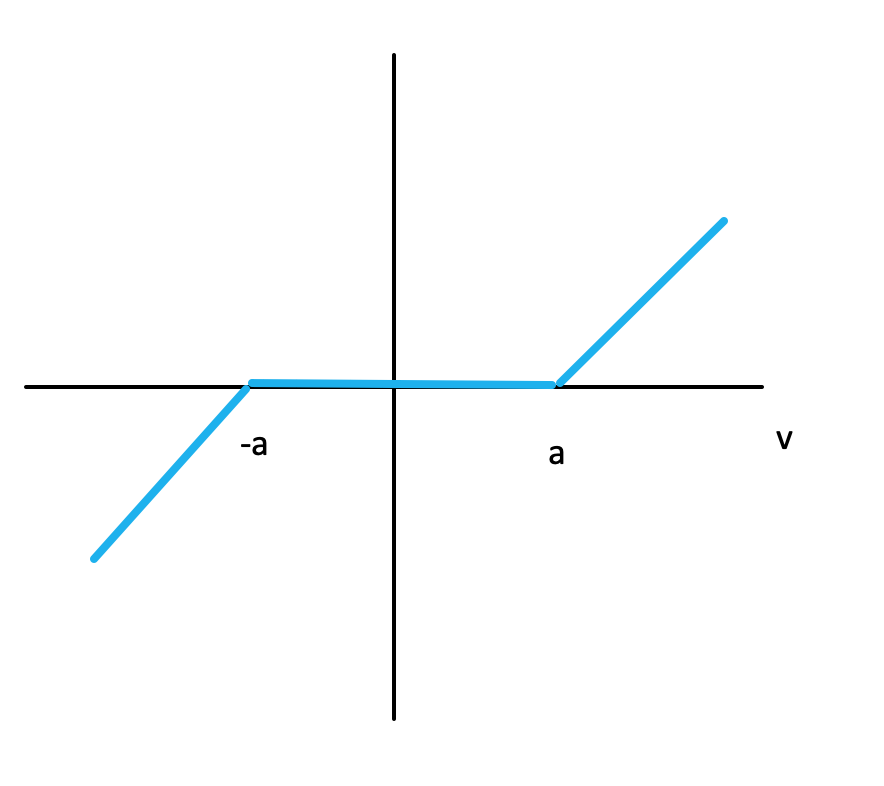

## partial gradient descent

**algorithm**

1. randomly initialize $X$


2. learn $\beta$

    for the current dict (a fixed $X$), solve for coefficients $\beta_i \in \mathbb{R}^D$ 

    using **forward selection or Lasso regression**

$$
\hat \beta_i=\underset{\text{sparse } \beta_i}{\arg \min}\sum _i^n\left \|\mathbf{y}_i -X\beta_i \right \|_2^2
$$

- For Lasso regression, use a $l_1$ norm regularizer

$$
\hat \beta_i=\underset{\text{sparse } \beta_i}{\arg \min}\sum _i^n\left \|\mathbf{y}_i -X\beta_i \right \|_2^2 + \lambda \left \| \beta_i \right \|_1
$$


3. **only update** $X$ using gradient descent slowly

$$
X^{(k+1)}=X^{(k)} - \eta \nabla_x L(X^{(k)} ,\beta)- \eta \mu X^{(k)}
$$
